In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('data.csv')

In [23]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [24]:
df.shape

(200, 4)

In [25]:
X = df.drop('target', axis=1)
y = df['target']

In [26]:
X.head()

,feature1,feature2,feature3
0,-0.570563,1.420342,0.495580
1,-0.990563,0.556965,1.045064
2,-0.674728,0.150617,1.774645
3,0.388250,-0.387127,-0.110229
4,1.167882,-0.024104,0.145063


In [27]:
y.head()

,target
0,-9.763182
1,-24.029355
2,45.616421
3,34.135737
4,86.663647


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [30]:
#residual

y_pred = lr.predict(X_test)
residual = y_test - y_pred

#1. Linear Relationship

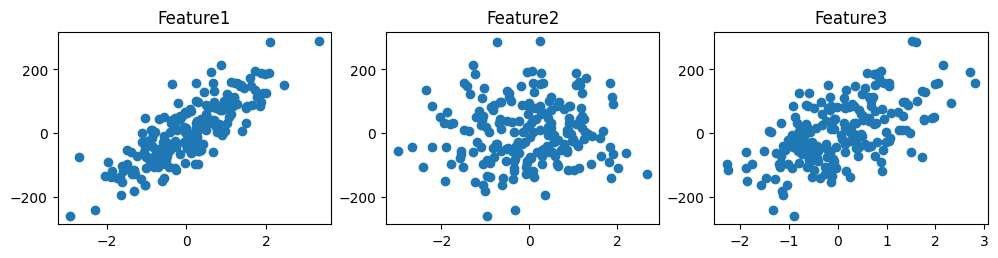

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

#2. Multicollinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [33]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.007082,1.002271,1.008529


<Axes: >

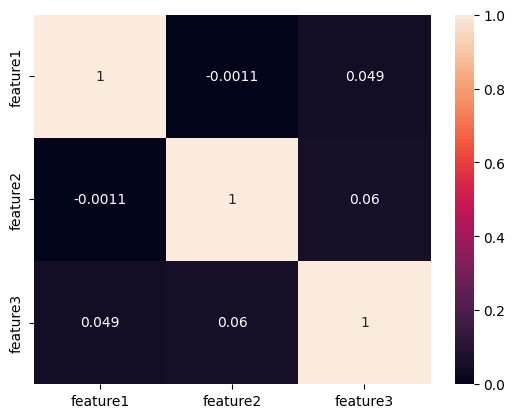

In [34]:
# Another Technique
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

#3. Normality of Residual

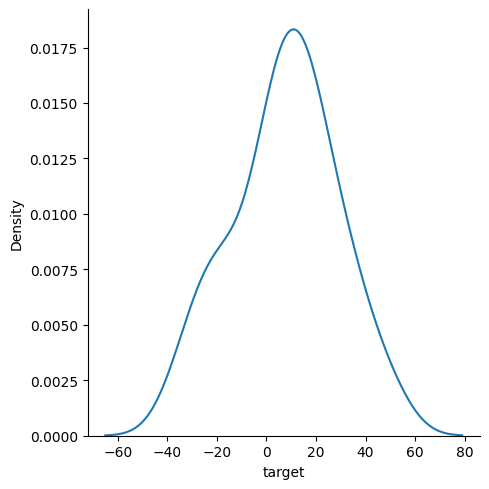

In [35]:
sns.displot(residual, kind='kde')

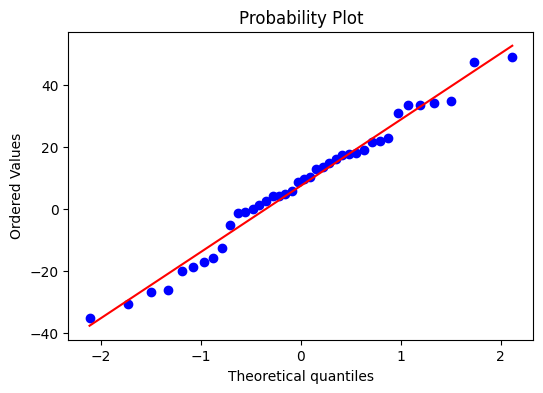

In [36]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

#4. Homoscedasticity

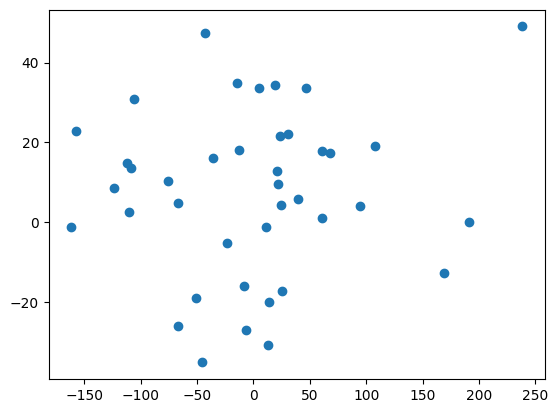

In [37]:
plt.scatter(y_pred, residual)

#5. Autocorrelation of Residuals

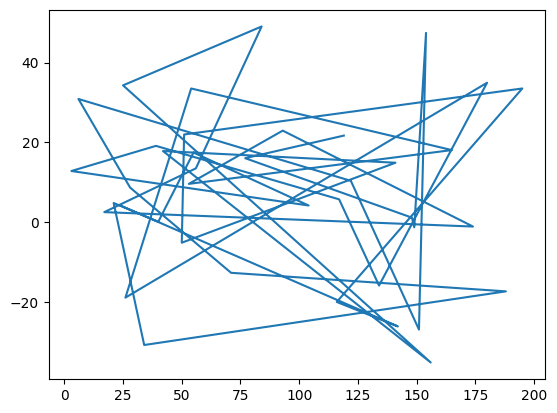

In [38]:
plt.plot(residual)